##### 影像邊緣偵測
這篇教學會介紹 OpenCV 三種影像邊緣偵測的方法 ( Laplacian()、Sobel()、Canny() )，透過這些方法，可以針對影像進行邊緣偵測，\
並將偵測的結果輸出成為新的影像。

因為程式中的 OpenCV 會需要使用鏡頭或 GPU，所以請使用本機環境或使用 Anaconda Jupyter 進行實作，\
並安裝 OpenCV 函式庫 ( 參考：[OpenCV 函式庫](https://steam.oxxostudio.tw/category/python/ai/opencv.html) )。

##### Laplacian() 
使用 OpenCV 的 Laplacian() 方法，可以針對「灰階圖片」，使用拉普拉斯運算子進行偵測邊緣的轉換，使用方法如下：

In [ ]:
cv2.Laplacian(img, ddepth, ksize, scale)
# img 來源影像
# ddepth 影像深度，設定 -1 表示使用圖片原本影像深度
# ksize 運算區域大小，預設 1 ( 必須是正奇數 )
# scale 縮放比例常數，預設 1 ( 必須是正奇數 )

下面的例子會將蒙娜麗莎圖片轉灰階後，再套用模糊化效果，最後使用 Laplacian() 方法產生邊緣偵測的影像。

* 參考：影像模糊化

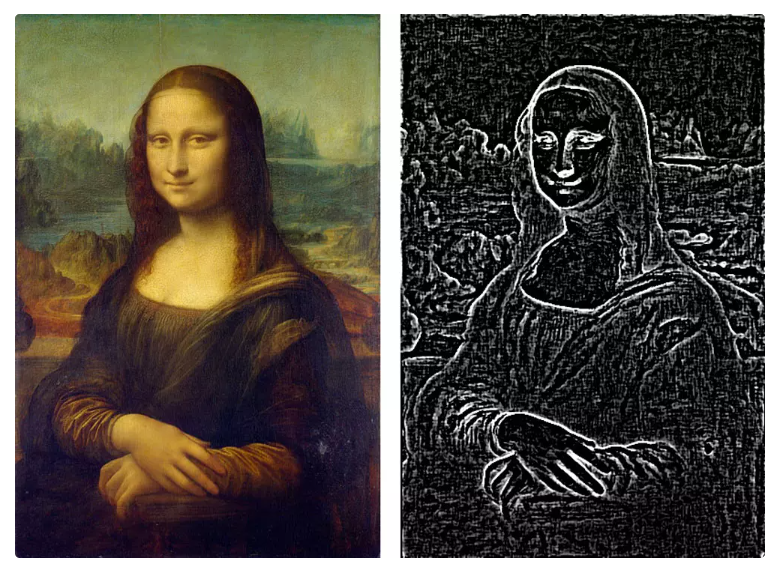

In [ ]:
import cv2
img = cv2.imread('mona.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # 轉成灰階
img = cv2.medianBlur(img, 7)                 # 模糊化，去除雜訊
output = cv2.Laplacian(img, -1, 1, 5)        # 偵測邊緣
cv2.imshow('oxxostudio', output)
cv2.waitKey(0)                               # 按下任意鍵停止
cv2.destroyAllWindows()

##### Sobel() 
使用 OpenCV 的 Sobel() 方法，可以針對「灰階圖片」，使用索伯運算子進行偵測邊緣的轉換，使用方法如下：

In [ ]:
cv2.Sobel(img, ddepth, dx, dy, ksize, scale)
# img 來源影像
# dx 針對 x 軸抓取邊緣
# dy 針對 y 軸抓取邊緣
# ddepth 影像深度，設定 -1 表示使用圖片原本影像深度
# ksize 運算區域大小，預設 1 ( 必須是正奇數 )
# scale 縮放比例常數，預設 1 ( 必須是正奇數 )

下面的例子會將蒙娜麗莎圖片轉灰階後，再套用模糊化效果，最後使用 Sobel() 方法產生邊緣偵測的影像。

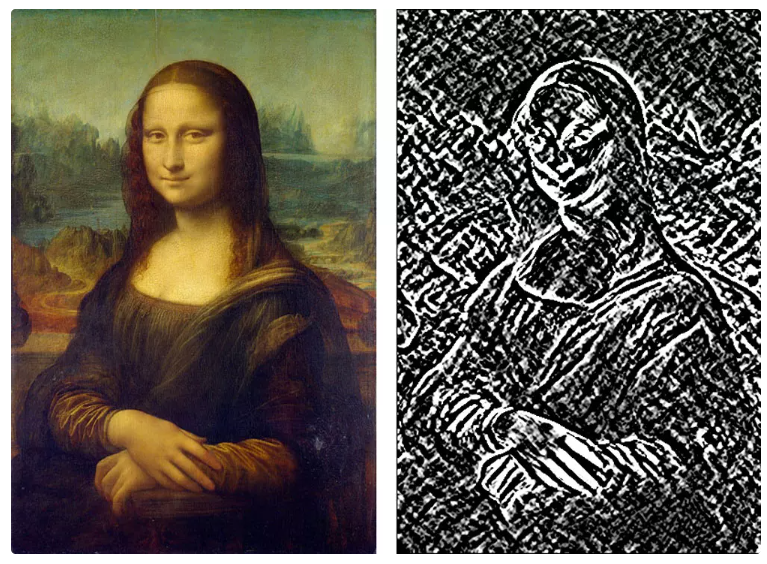

In [ ]:
import cv2
img = cv2.imread('mona.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # 轉成灰階
img = cv2.medianBlur(img, 7)                 # 模糊化，去除雜訊
output = cv2.Sobel(img, -1, 1, 1, 1, 7)      # 偵測邊緣
cv2.imshow('oxxostudio', output)
cv2.waitKey(0)
cv2.destroyAllWindows()

##### Canny() 
使用 OpenCV 的 Canny() 方法，可以針對「灰階圖片」，使用 Canny 運算子進行偵測邊緣的轉換，使用方法如下：

In [ ]:
cv2.Canny(img, threshold1, threshold2, apertureSize)
# img 來源影像
# threshold1 門檻值，範圍 0～255
# threshold2 門檻值，範圍 0～255
# apertureSize 計算梯度的 kernel size，預設 3

下面的例子會將蒙娜麗莎圖片轉灰階後，再套用模糊化效果，最後使用 Canny() 方法產生邊緣偵測的影像。

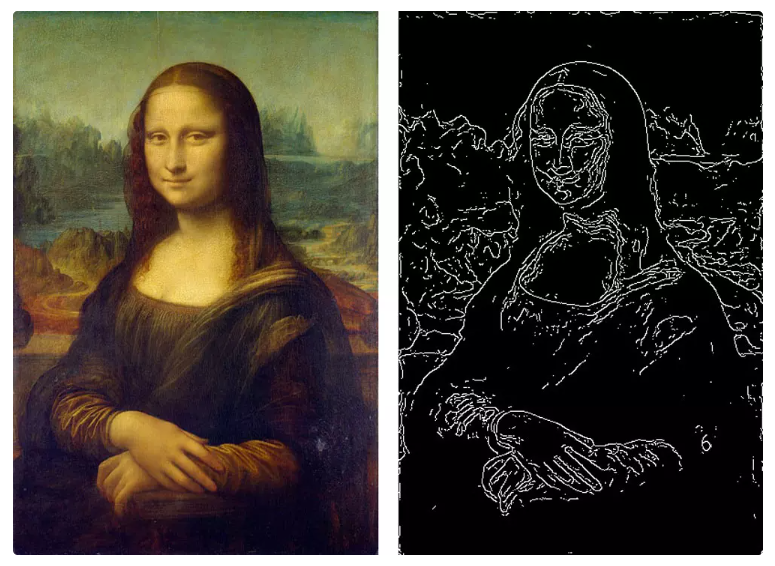

In [ ]:
import cv2
img = cv2.imread('mona.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # 轉成灰階
img = cv2.medianBlur(img, 7)                 # 模糊化，去除雜訊
output = cv2.Canny(img, 36, 36)              # 偵測邊緣
print(output)
cv2.imshow('oxxostudio', output)
cv2.waitKey(0)
cv2.destroyAllWindows()

##### 影片的影像邊緣偵測 
延伸「[讀取並播放影片](https://steam.oxxostudio.tw/category/python/ai/opencv-read-video.html)」文章的範例，在程式碼中使用 Canny() 邊緣偵測方法，就能將電腦鏡頭拍攝的畫面，即時轉換成只剩下邊緣的影像。

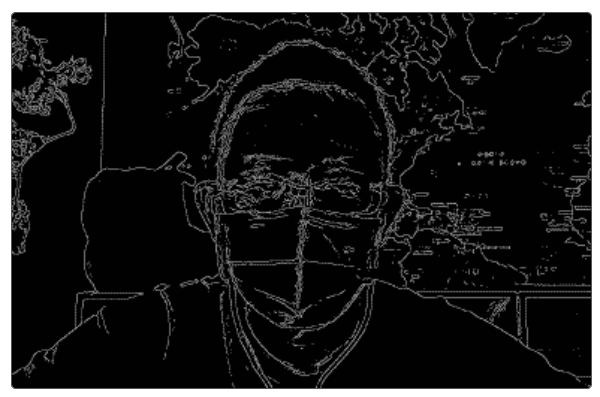

In [ ]:
import cv2
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Cannot open camera")
    exit()
while True:
    ret, frame = cap.read()
    if not ret:
        print("Cannot receive frame")
        break
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # 轉成灰階
    img = cv2.medianBlur(img, 7)                   # 模糊化，去除雜訊
    img = cv2.Canny(img, 36, 36)                   # 偵測邊緣
    cv2.imshow('oxxostudio', img)
    if cv2.waitKey(1) == ord('q'):
        break                                      # 按下 q 鍵停止
cap.release()
cv2.destroyAllWindows()